In [143]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [144]:
data = pd.read_csv("C:\\Users\\cecil\\OneDrive\\Desktop\\Projects\\data.csv") # Dataset is now stored in a Pandas Dataframe

# Exploratory Data Analysis

In [145]:
print("There are", data.shape[0], "rows and", data.shape[1], "columns in the dataset.")

There are 569 rows and 33 columns in the dataset.


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The last column in the dataset contains all NA values, and so we remove it.

## Cleaning Data

In [147]:
data = data.drop(['Unnamed: 32'], axis = 1)
print("After data cleaning, there are", data.shape[0], "observations and", data.shape[1], "features in the dataset.")

After data cleaning, there are 569 observations and 32 features in the dataset.


In [148]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [149]:
data.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

There are no features that contains NA values.


## Numerical Features: Descriptive Statistics

In [150]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

## Categorical Features: Descriptive Statistics

In [151]:
data.describe(include = 'O')

diagnosis
count        569
unique         2
top            B
freq         357

## Feature Design

Getting features that have moderate to high correlation with Diagnosis. Then assigning it to new dataframe.


## Data Visualization


We are selecting the mean features, since the other features are highly related.

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

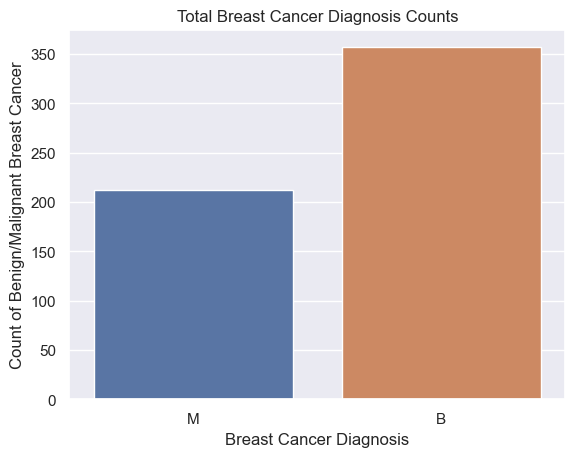

In [153]:
sns.countplot(x="diagnosis", data = data)

plt.xlabel("Breast Cancer Diagnosis")
plt.ylabel("Count of Benign/Malignant Breast Cancer")
plt.title("Total Breast Cancer Diagnosis Counts")

plt.show()

## Feature Scaling

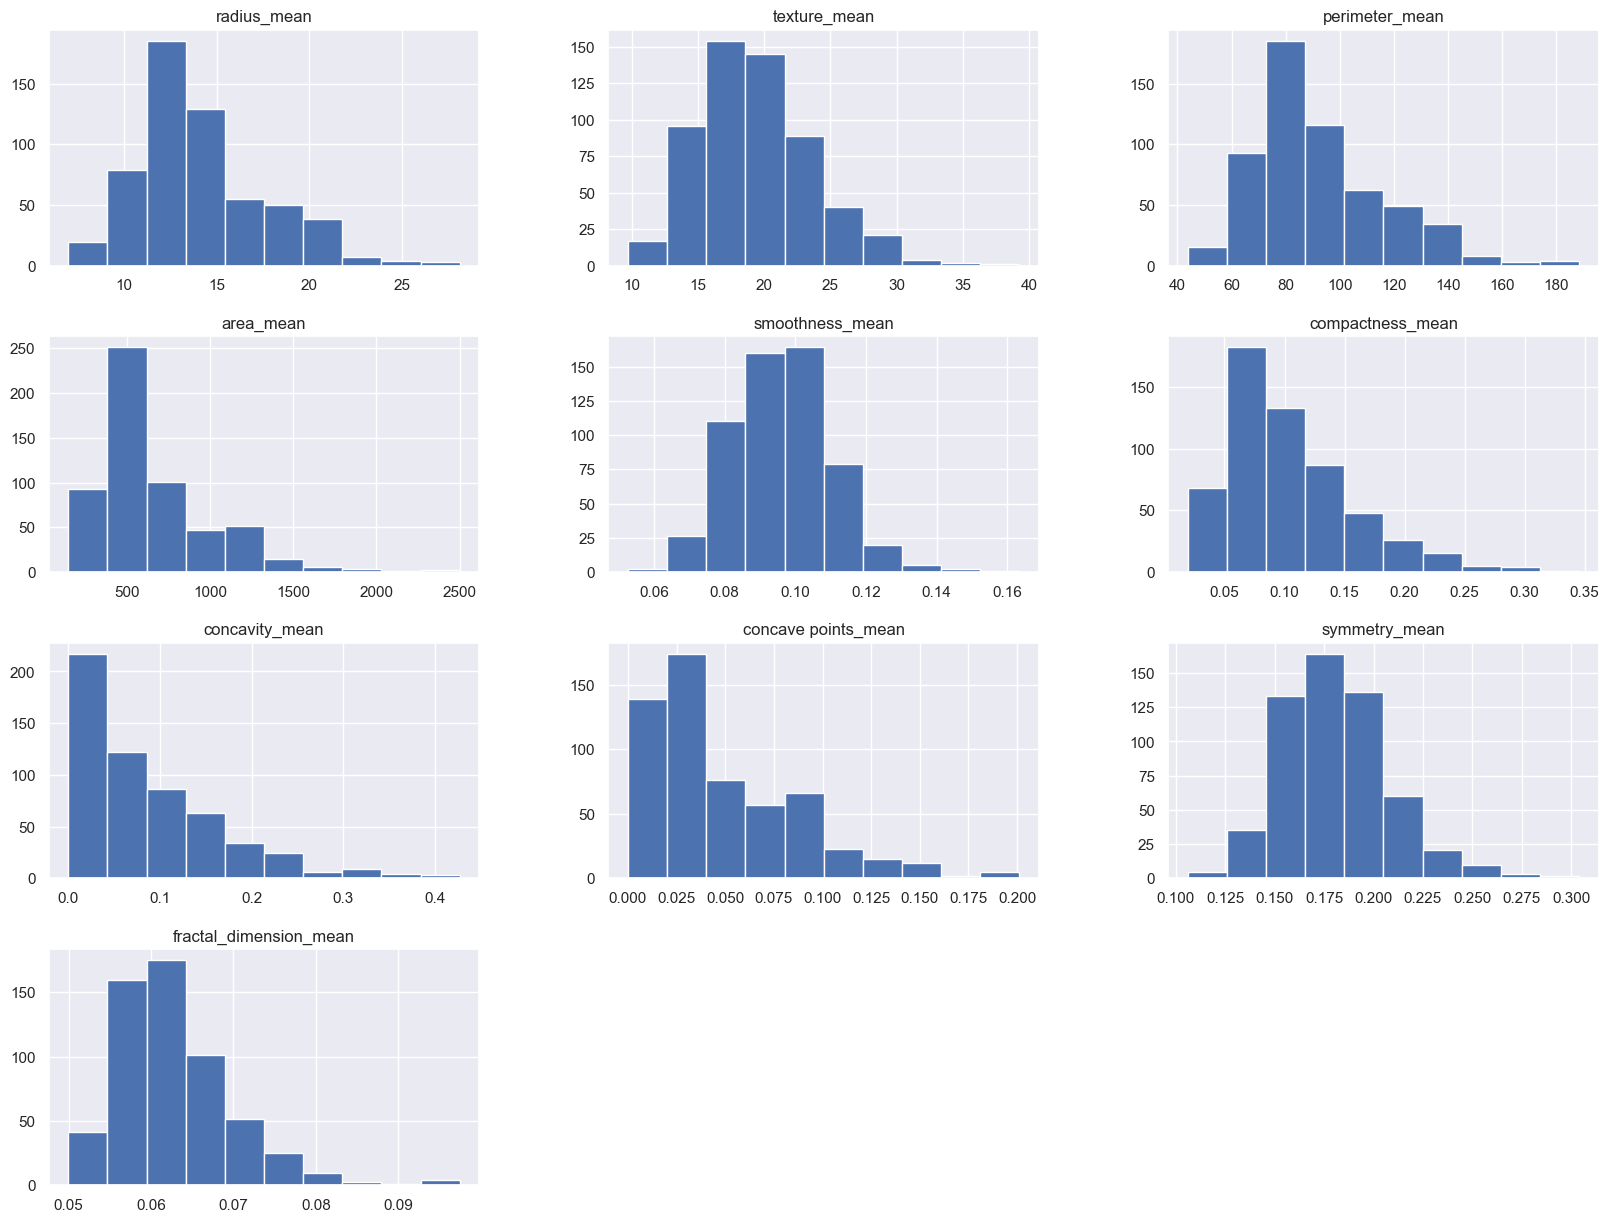

In [154]:
X = data.iloc[:, 2:12]
X.hist(figsize=(20, 15));

Most of the distributions are right-skewed, which indicates that not all features follow a standard normal distribution (mean=0, variance=1), which would present itself as a bell-shaped curve. Their scales also vary, which may cause features with higher scales/magnitudes  contributing more to the model training process. There's different measurement scales and ranges of values, such as for the radius and area. To address this, we want to ensure that all features are contributing equally to the model training process through the process of feature scaling.

Feature scaling refers to the process of transforming the values of the features to a similar scale. 

This process is necessary for our following SVM model, which is distance-based, so that features with high magnitudes do not dominate the distance calculations. 

In [155]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler

In [156]:
mean_data = data.iloc[:, 2:12] # Each observation has 10 means corresponding to 10 main features (i.e. radius, texture, smoothness, etc.)

# STANDARDIZING MEAN
mapper = DataFrameMapper([(mean_data.columns, StandardScaler())])
scaled_features = mapper.fit_transform(mean_data.copy(), 10)
scaled_features_df = pd.DataFrame(scaled_features, index=mean_data.index, columns=mean_data.columns)

print(scaled_features_df.head(5))   

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  
0                2.255747  
1               -0.868652  
2       

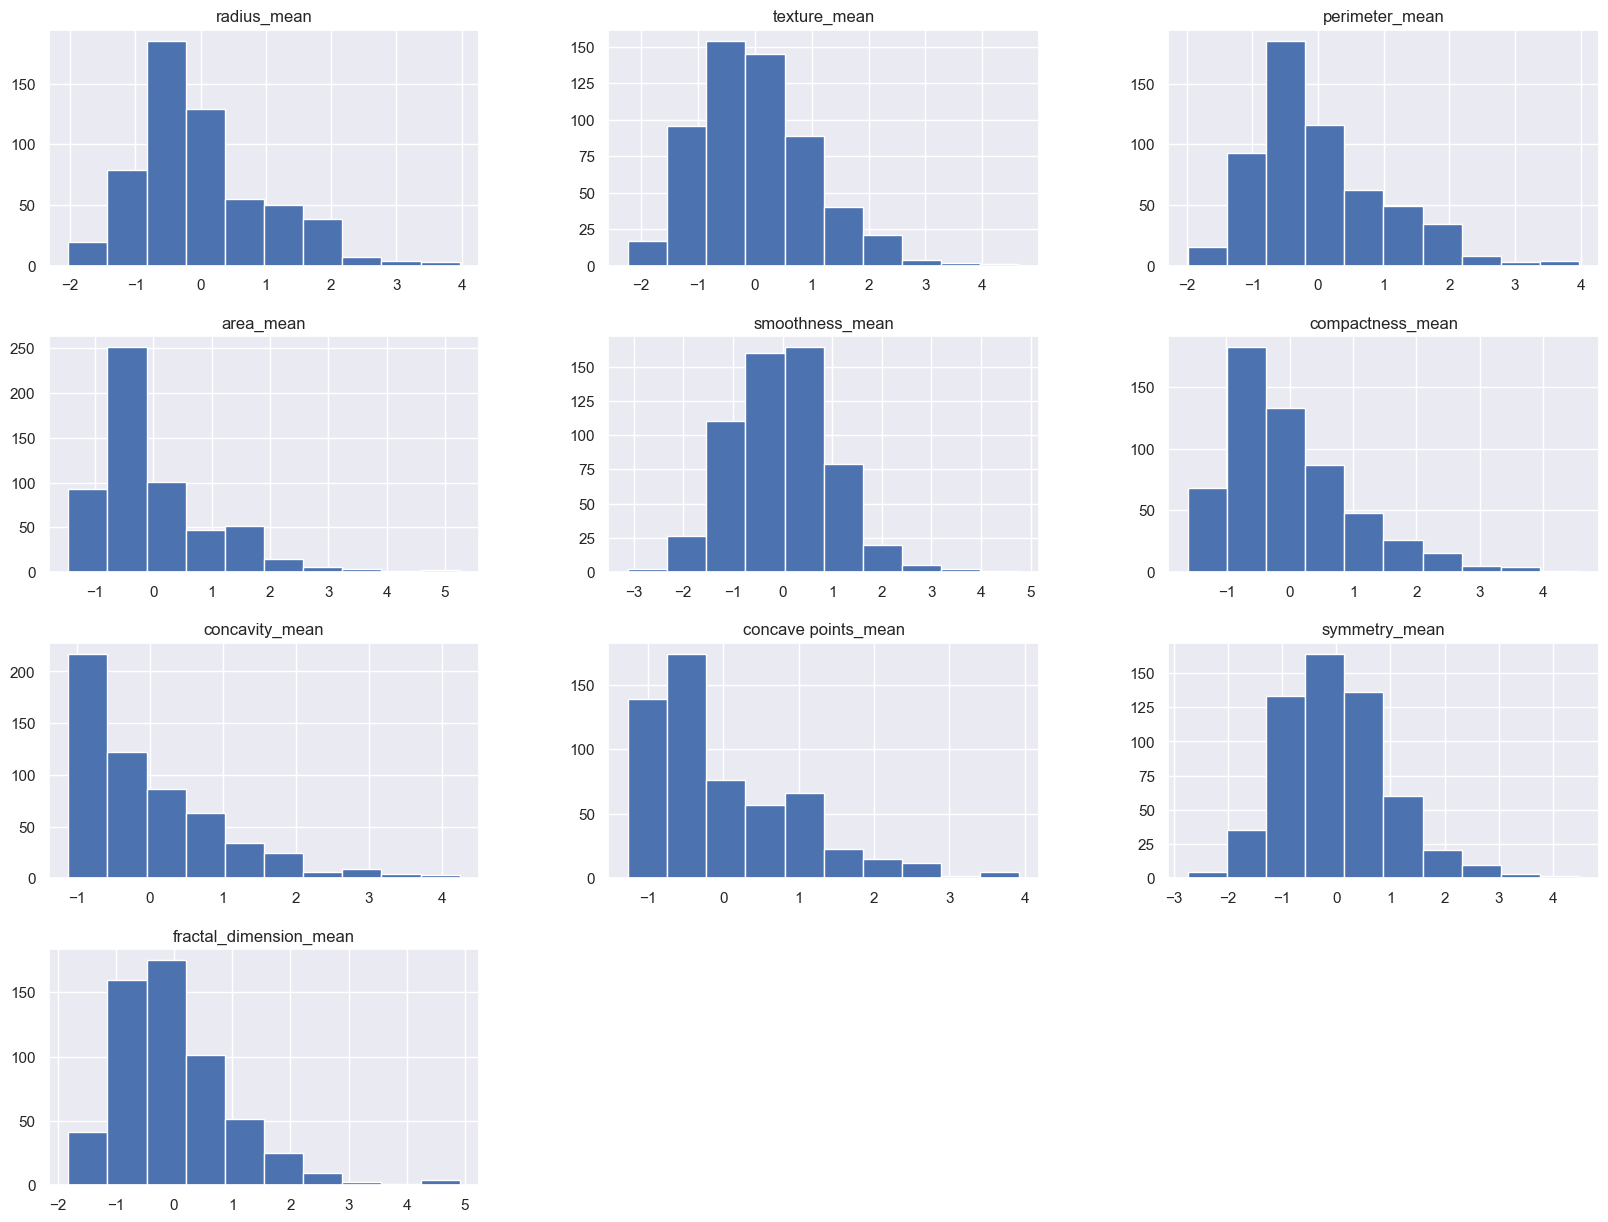

In [157]:
scaled_features_df.hist(figsize=(20, 15));

In [158]:
scaled_features_df  = pd.concat([data.iloc[:,0:2], scaled_features_df.iloc[:,:]], axis=1) # concatenate id, diagnosis with standardized means
scaled_features_df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M     1.097064     -2.073335        1.269934   0.984375   
1      842517         M     1.829821     -0.353632        1.685955   1.908708   
2    84300903         M     1.579888      0.456187        1.566503   1.558884   
3    84348301         M    -0.768909      0.253732       -0.592687  -0.764464   
4    84358402         M     1.750297     -1.151816        1.776573   1.826229   
..        ...       ...          ...           ...             ...        ...   
564    926424         M     2.110995      0.721473        2.060786   2.343856   
565    926682         M     1.704854      2.085134        1.615931   1.723842   
566    926954         M     0.702284      2.045574        0.672676   0.577953   
567    927241         M     1.838341      2.336457        1.982524   1.735218   
568     92751         B    -1.808401      1.221792       -1.814389  -1.347789   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           1.568466          3.283515        2.652874             2.532475   
1          -0.826962         -0.487072       -0.023846             0.548144   
2           0.942210          1.052926        1.363478             2.037231   
3           3.283553          3.402909        1.915897             1.451707   
4           0.280372          0.539340        1.371011             1.428493   
..               ...               ...             ...                  ...   
564         1.041842          0.219060        1.947285             2.320965   
565         0.102458         -0.017833        0.693043             1.263669   
566        -0.840484         -0.038680        0.046588             0.105777   
567         1.525767          3.272144        3.296944             2.658866   
568        -3.112085         -1.150752       -1.114873            -1.261820   

     symmetry_mean  fractal_dimension_mean  
0         2.217515                2.255747  
1         0.001392               -0.868652  
2         0.939685               -0.398008  
3         2.867383                4.910919  
4        -0.009560               -0.562450  
..             ...                     ...  
564      -0.312589               -0.931027  
565      -0.217664               -1.058611  
566      -0.809117               -0.895587  
567       2.137194                1.043695  
568      -0.820070               -0.561032  

[569 rows x 12 columns]

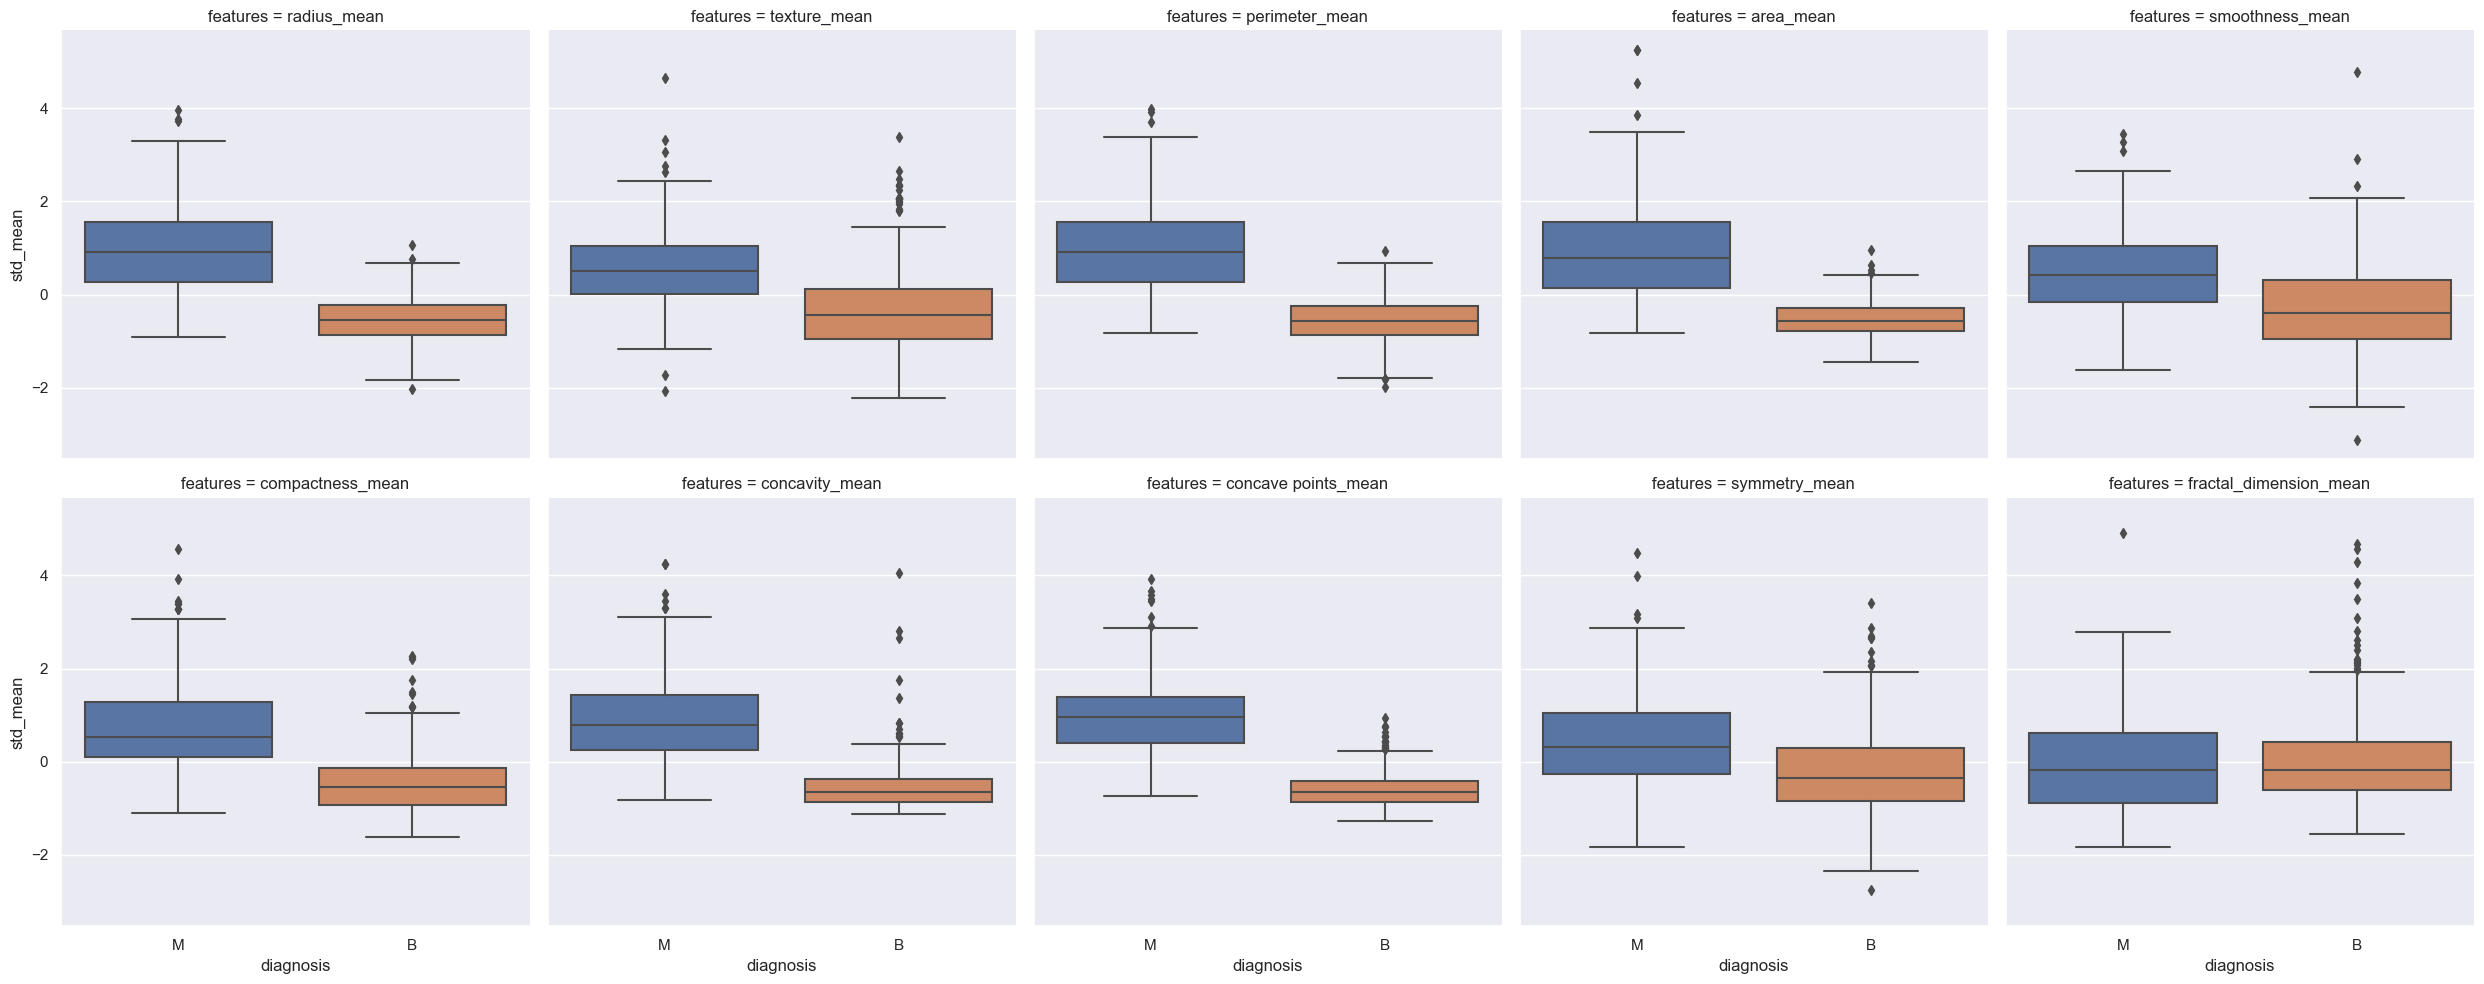

In [159]:
# Convert Standardized Data Frame from Wide Format to Long Format
data_melt = pd.melt(scaled_features_df, id_vars = ["id", "diagnosis"], var_name = "features", value_name = "std_mean")
data_melt.head(5)


# Boxplot for Each Main Feature Mean (i.e. radius_mean, texture_mean, smoothness_mean, etc.)
g = sns.catplot(data= data_melt, x = 'diagnosis', y = 'std_mean', col = 'features', kind = 'box', col_wrap = 5)  

After feature scaling using standardization, each boxplot of the mean features are scaled to have zero mean and unit variance, mitigating the effects of features with extreme values, which can affect the model's performance.

[]

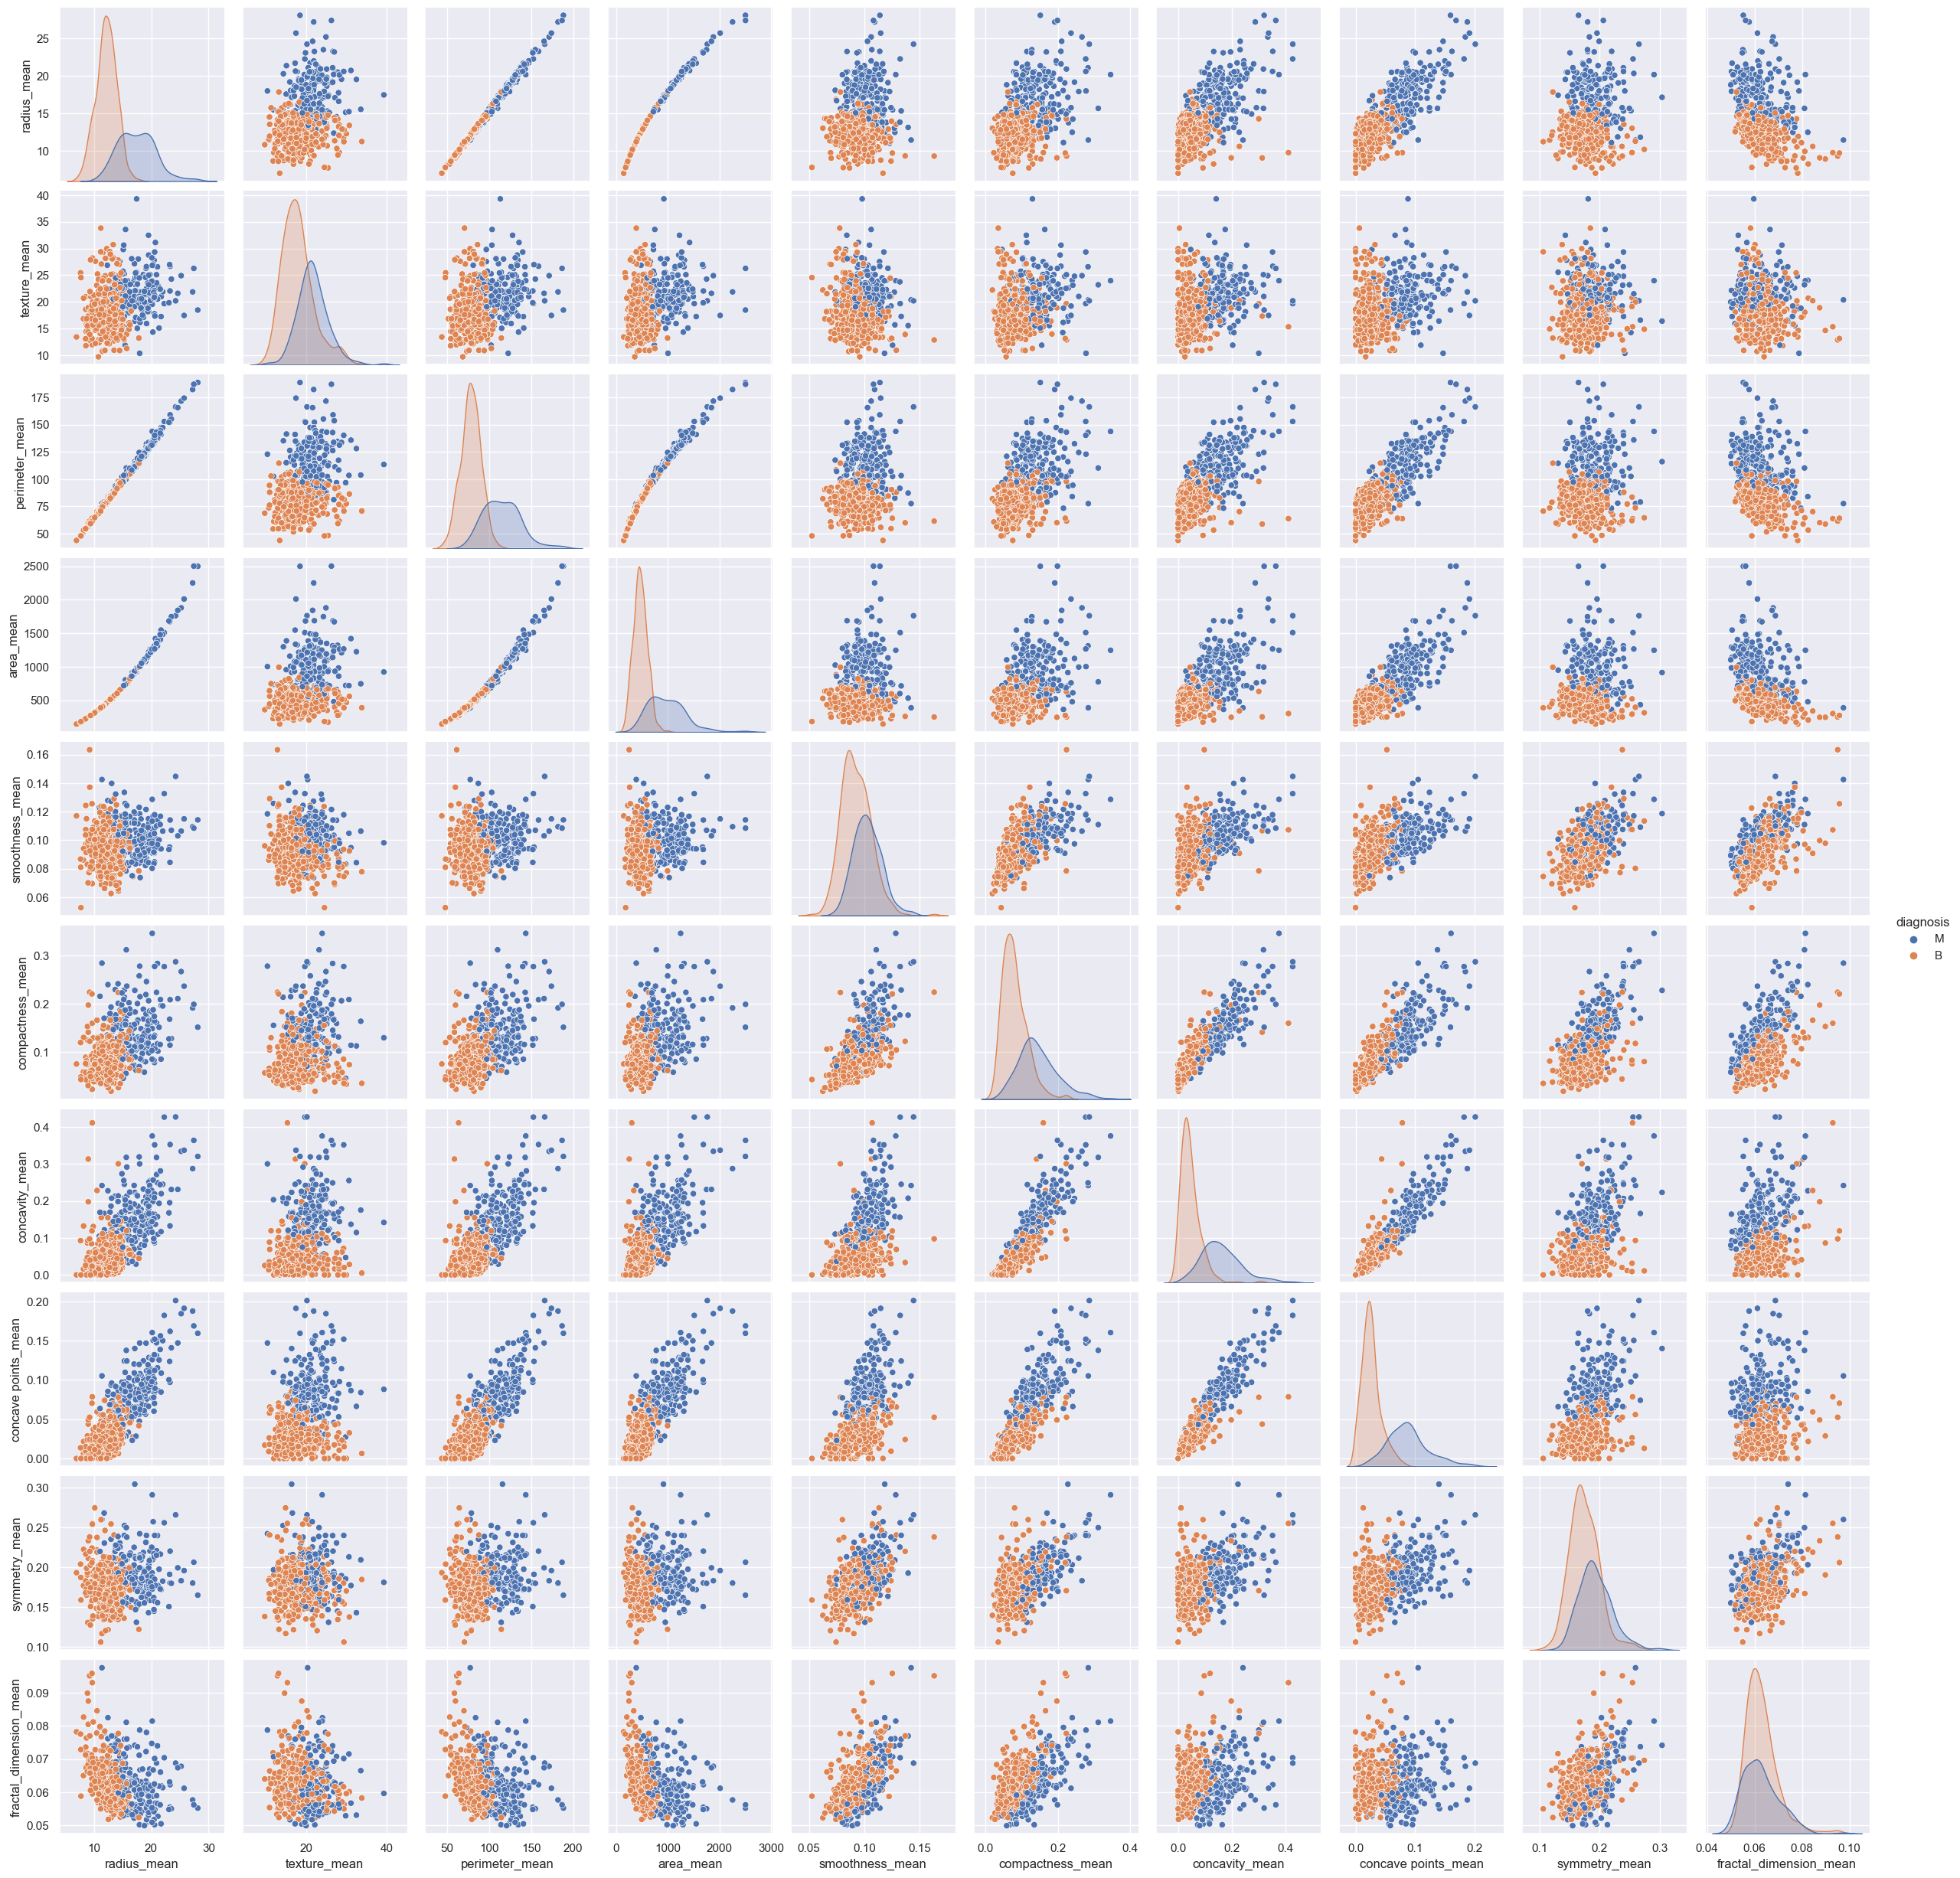

In [160]:
temp = pd.concat([data.iloc[:,1], mean_data.iloc[:,:]], axis=1)
sns.pairplot(temp, hue="diagnosis")
plt.plot()

From the pairplot, there exists strong multicolinarity where strong linear positive correlations are seen between the features, such as perimeter mean and radius mean and area mean, suggesting that the model can be affected negatively during classification training. There may be overfitting, unstable or inaccurate model coefficients, and become more difficult to interpret feature importance. 

To counter this, we have to carefully choose our classification algorithms for our models, which can improve our performance accuracy and generalization when comparing our model to the test data.

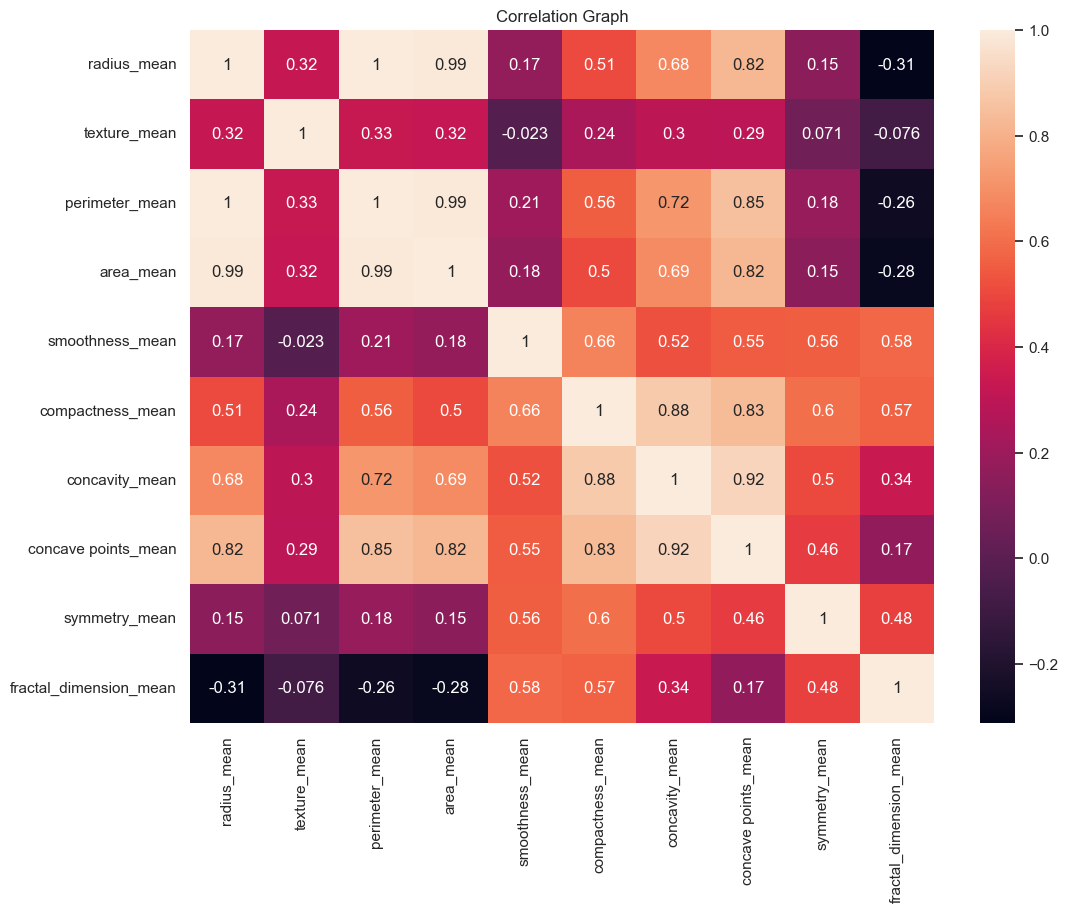

In [161]:
plt.figure(figsize=(12, 9))

plt.title("Correlation Graph")
cols = list(mean_data.columns)
# print(cols)

sns.heatmap(data[cols].corr(), annot=True);

From the heatmap, we can also view strong correlations between variables, suggesting multicollinearity.

## Feature Encoding 

We will transform categorical diagnosis features into 0/1 to prepare for classification modeling. We notice there is an imbalance in classes.

In [162]:
from sklearn import preprocessing

label_encoder= preprocessing.LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis']) 
data['diagnosis'].head()

# Reassign Numerical Labels to Diagnosis Column
data['diagnosis']= label_encoder.fit_transform(data['diagnosis'])
data['diagnosis'].value_counts()

#scaled_features_df

0    357
1    212
Name: diagnosis, dtype: int64

## Model Exploration

#### Splitting Data

In [163]:
from sklearn.model_selection import train_test_split

# Split the data to train and test the model (.8,.2) --> 80% assigned to train, 20% assigned to validate/test
mean_features = data.iloc[:, 1:12]

X = mean_features.drop(['diagnosis'], axis=1)
Y = mean_features['diagnosis']

Xtr, Xtest, Ytr, Ytest = train_test_split(X, Y, test_size = 0.2, random_state=10)

#### Data Preprocessing

##### Feature Scaling for SVM

In [164]:
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [165]:
# Perform feature scaling transformation on the features
scaler = StandardScaler()  

Xtr_std =  scaler.fit_transform(Xtr)
Xtest_std = scaler.transform(Xtest)

## SVM

We only split data once into test and train set as the cross-validation strategy is implicitly used to estimate the model's performance on new, unseen data and select the best hyperparameters when we train with SVC (default 5-K Fold cross validation). 

#### Model

Our model will include a soft margin classifier, since we want more robustness in regards to outliers and handle possible non-linear separable data. 

Here, choosing linear kernel SVM for linearly separable data first, seeing that the training set is very large/has plenty of features. We will utilize the hinge loss function with the linear kernel svm for regularization.

In [166]:
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

svm_model = svm.SVC(kernel='linear', class_weight='balanced', C = 0.05) # Linear Kernel w/ parameter
#Train model
svm_model.fit(Xtr_std, Ytr)

#Prediction based on training data
Y_pred_train = svm_model.predict(Xtr_std)
Y_pred_test = svm_model.predict(Xtest_std)

# Model Accuracy
train_score = metrics.accuracy_score(Ytr, Y_pred_train)*100
test_score = metrics.accuracy_score(Ytest, Y_pred_test)*100

print(svm_model)
print("Train Accuracy Score:",round(train_score,2),"%")
print("Test Accuracy Score:",round(test_score,2),"%")

SVC(C=0.05, class_weight='balanced', kernel='linear')
Train Accuracy Score: 93.85 %
Test Accuracy Score: 93.86 %


## Data Training, Tuning, and Evaluation Pipeline
- Model Training with Hyperparameter Tuning with Stratified K-Fold Cross Validation, then model evaluation
    -Do not need separate validation data subset, implicitly made in K-Fold
- For best model selection

### Hyperparameter Tuning
To train our model and to obtain the optimal hyperparameters for our engineered model with best performance, we can perform K-Fold cross-validation and can implement the GridSearchCV method, the RandomizedSearchCV, and also Bayesian optimization.

We chose Bayesian Optimization, which is more efficient as it considered an informed search method, referring to the past model performance iterations, instead of the other two methods, which are independent from past model evaluations.

In [299]:

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from skopt import BayesSearchCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import time

"""
Creating a comprehensice data pipeline 
for model training and evaluation on test set
"""
class BreastCancerModel:
    def __init__(self, model, param_grid):  
        self.model = model
        self.param_grid = param_grid
        self.best_model = None
        
        #Using split and scaled dataset 
        self.Xtr_std = Xtr_std
        self.Xtest_std = Xtest_std 
        self.Ytr = Ytr
        self.Ytest = Ytest
        
    """""
    Note: additional args other than self and instance attributes are parameters 
    that is specific for the function, and not inherent to instance,
    allowing for flexibility for the function 
    (ex. Class Square, def area(self, unit='square meters'))
    """""
    
    def hyperparam_tune(self): 
        #Using Training Set
        starttime= time.process_time()
        
        #Straified K Fold
        cross_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        #Grid Search
        # best_model = GridSearchCV(self.model, param_grid = self.param_grid, cv = cross_val,  scoring='accuracy', n_jobs=-1)
        #Bayesian Optimization
        best_model = BayesSearchCV(self.model, self.param_grid, cv = cross_val, n_iter = 50, random_state = 10, n_jobs=-1)
        best_model.fit(self.Xtr_std, self.Ytr)
        
        
        self.best_model = best_model.best_estimator_
        best_params = best_model.best_params_
        best_acc_score = best_model.best_score_
        
        print(f"Model: {self.best_model}")
        print(f"Training Set Metrics:")
        print(f"  Best HyperParameters: {best_params}")
        print(f"  Cross-Validated Accuracy: {best_acc_score} ")
        
        endtime= time.process_time()
        totaltime= endtime-starttime
        print(f"  Training time: {totaltime} \n")
        
        return self.best_model
        

    def evaluate_model(self):
    #Test performance of best model from tuning on test data
        y_pred_test = self.best_model.predict(self.Xtest_std)
        
        class_report = classification_report(Ytest, y_pred_test)
        test_accuracy = accuracy_score(self.Ytest, y_pred_test)
        precision = precision_score(self.Ytest, y_pred_test)
        recall = recall_score(self.Ytest, y_pred_test)
        f1 = f1_score(self.Ytest, y_pred_test)

        print(f"Test Set Metrics:")
        print(f"  Accuracy: {test_accuracy}")
        print(f"  Precision: {precision}")
        print(f"  Recall: {recall}")
        print(f"  F1 Score: {f1}\n")
        print(class_report)
        
    def plot_roc_auc_curve(self):
        y_score = self.best_model.predict_proba(self.Xtest_std)[:, 1]  # Get probabilities for the positive class
        fpr, tpr, _ = roc_curve(self.Ytest, y_score)
        roc_auc = auc(fpr, tpr)
        print(f"AUC Score: {roc_auc}")
        
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc="lower right")
        plt.show()
        
    def plot_feature_importance(self):
        model_feature_importances = self.best_model.feature_importances_
        feature_names = Xtr.columns

        #Sort and map feature importance values along with feature names
        sorted_indices = np.argsort(model_feature_importances) 
        sorted_importances = model_feature_importances[sorted_indices]
        sorted_features = feature_names[sorted_indices]
            
        # Plot the feature importances
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.barh(range(len(sorted_importances)), sorted_importances, align='center')
        ax.set_yticks(range(len(sorted_importances)))
        ax.set_yticklabels(sorted_features)
        ax.set_xlabel('Feature Importance Weights')
        ax.set_ylabel('Feature')
        ax.set_title(f'{self.model} Feature Importance')

        return fig, ax

### SVM Model

Model: SVC(C=296.460759628175, class_weight='balanced', gamma=0.0013225890571774831,
    kernel='linear', probability=True)
Training Set Metrics:
  Best HyperParameters: OrderedDict([('C', 296.460759628175), ('class_weight', 'balanced'), ('gamma', 0.0013225890571774831), ('kernel', 'linear'), ('probability', True)])
  Cross-Validated Accuracy: 0.9428571428571428 
  Training time: 227.203125 

Test Set Metrics:
  Accuracy: 0.9210526315789473
  Precision: 0.8571428571428571
  Recall: 0.9230769230769231
  F1 Score: 0.888888888888889

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        75
           1       0.86      0.92      0.89        39

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.92      0.92       114

AUC Score: 0.9767521367521368


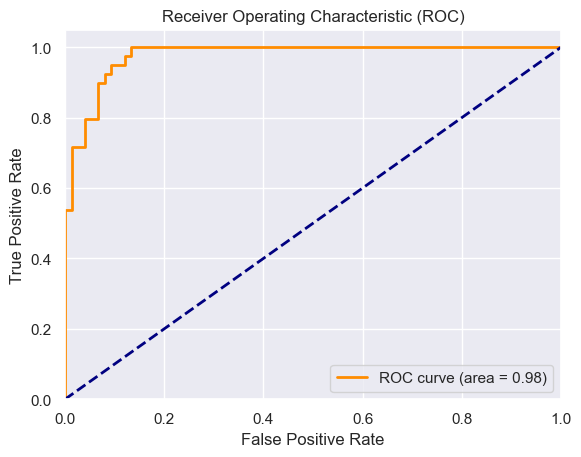

In [300]:
from sklearn.svm import SVC
#creating instance with model,param
param_grid_svm = {
                'kernel' : Categorical(['linear', 'poly', 'rbf']),
                'C': Real(1e-3, 1e3, prior='log-uniform'),
                'gamma': Real(1e-3, 1e3, prior='log-uniform'),
                'class_weight': Categorical(['balanced']),
                'probability': Categorical([True])
                }

Xtr, Xtest, Ytr, Ytest
svm_model = BreastCancerModel(model = SVC(), param_grid = param_grid_svm)
svm_model.hyperparam_tune()
svm_model.evaluate_model()
svm_model.plot_roc_auc_curve()

### Random Forest

Random forest is an ensemble learning algorithm based on the average predictions of multiple decision trees to improve performance and generalization with the final prediciton. Ensemble learning is where each decision tree is trained with bootstrapped data (or randomly sampled with replacement) from the original data, with a random subset of features at each split, to reduce overfitting.

Model: RandomForestClassifier(max_depth=9, max_features=8, n_estimators=50)
Training Set Metrics:
  Best HyperParameters: OrderedDict([('criterion', 'gini'), ('max_depth', 9), ('max_features', 8), ('min_samples_leaf', 1), ('n_estimators', 50)])
  Cross-Validated Accuracy: 0.945054945054945 
  Training time: 206.171875 

Test Set Metrics:
  Accuracy: 0.9649122807017544
  Precision: 0.9487179487179487
  Recall: 0.9487179487179487
  F1 Score: 0.9487179487179487

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.95      0.95      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

AUC Score: 0.9919658119658119


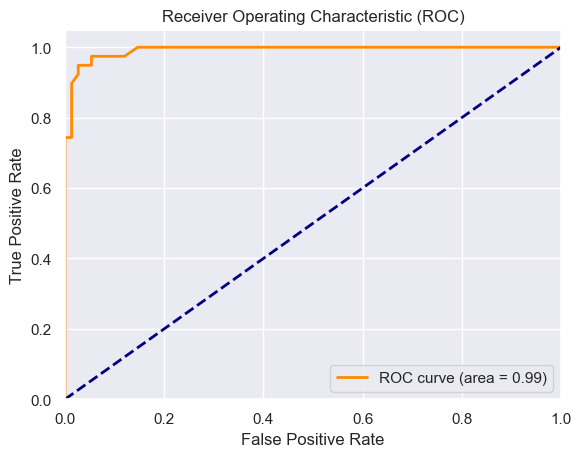

In [301]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.model_selection import GridSearchCV
from skopt.space import Real, Integer, Categorical

# Define the hyperparameters to tune
param_grid_rf = {'n_estimators': Integer(50, 200), # number of decision trees in forest
                'max_features': Integer(1,10), # maximum number of features to consider when splitting a node in each decision tree in the random forest.
                'max_depth': Integer(2, 15), # maximum depth of the tree
                'min_samples_leaf': Integer(1,3), # minimum number of samples to include in a leaf node
                'criterion': Categorical(['gini','entropy']) }


rf_model = BreastCancerModel(model = RandomForestClassifier(), param_grid = param_grid_rf)
rf_model.hyperparam_tune()
rf_model.evaluate_model()
rf_model.plot_roc_auc_curve()

### Ada Boost
Adaboost is ensemble learning algorithm similar to random forest (however not a tree-based model) in where it combines trained weak 'learners' to arrrive at a final prediction in the form of a strong learner. In each iteration of training and optimizing, higher weights are assigned to misclassified data points in model parameters from the previous learner, to the next weak learner to focus on incorrect classified instances.

Model: AdaBoostClassifier(algorithm='SAMME', learning_rate=0.8235600713255532,
                   n_estimators=88)
Training Set Metrics:
  Best HyperParameters: OrderedDict([('algorithm', 'SAMME'), ('base_estimator', None), ('learning_rate', 0.8235600713255532), ('n_estimators', 88)])
  Cross-Validated Accuracy: 0.9582417582417582 
  Training time: 223.078125 

Test Set Metrics:
  Accuracy: 0.9385964912280702
  Precision: 0.9
  Recall: 0.9230769230769231
  F1 Score: 0.9113924050632911

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        75
           1       0.90      0.92      0.91        39

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

AUC Score: 0.9935042735042734


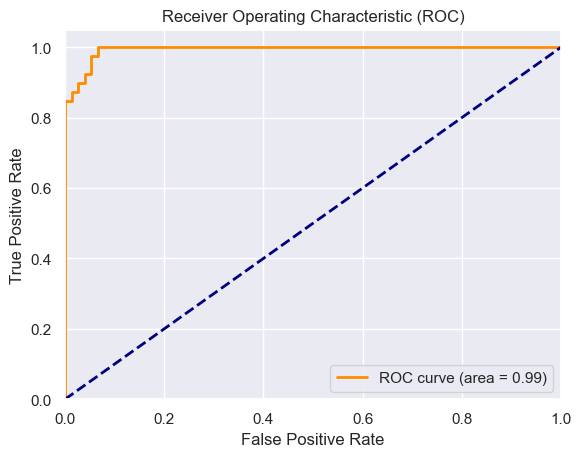

In [302]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from skopt.space import Integer, Real, Categorical

param_grid_adaboost = { 'n_estimators': Integer(50, 200),
                     'learning_rate': Real(0.1, 1.0, 'uniform'),
                     'base_estimator': Categorical([None, DecisionTreeClassifier(max_depth=1),
                                                    DecisionTreeClassifier(max_depth=3)]),
                     'algorithm': Categorical(['SAMME', 'SAMME.R'])}

ada_model = BreastCancerModel(model = AdaBoostClassifier(), param_grid = param_grid_adaboost)
ada_model.hyperparam_tune()
ada_model.evaluate_model()
ada_model.plot_roc_auc_curve()

### XGBoost
XGBoost algorithm is also an ensemble learning, optimizing models with the combined overall predictions of multiple learners in each training iteration, as well as providing several regualrizationtechniques to improve generalizability and performance.

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9957458233450732, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0760884268996176,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4588057843512269,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=169, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Training Set Metrics:
  Best HyperParameters: OrderedDict([('colsample_bytree', 0.9957458233450732), ('gamma', 0.0760884268996176), ('learning_rate', 0.4588057843512269), ('max_depth'

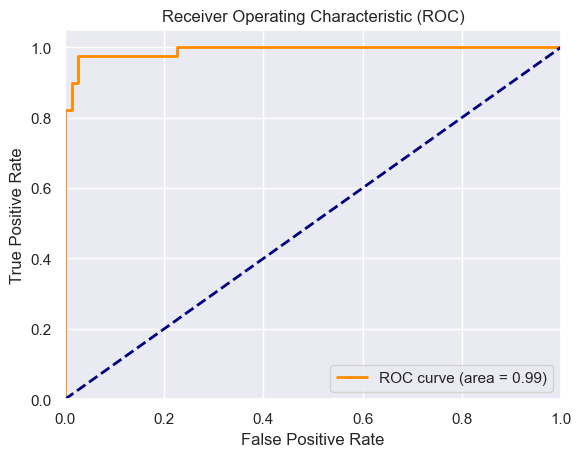

In [303]:
from xgboost import XGBClassifier

param_grid_xgb = {
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'n_estimators': Integer(50, 200),
    'max_depth': Integer(1, 10),
    'subsample': Real(0.5, 1.0, 'uniform'),
    'colsample_bytree': Real(0.5, 1.0, 'uniform'),
    'gamma': Real(0.0, 1.0, 'uniform'),
}

xgb_model = BreastCancerModel(model = XGBClassifier(), param_grid = param_grid_xgb)
xgb_model.hyperparam_tune()
xgb_model.evaluate_model()
xgb_model.plot_roc_auc_curve()

## Feature Importance and Explainability
We would like to observe which features were crucial during the training process of our models. This is through showing model explainability through feature importance, as they are large identifiers during training that affect performance.

### AdaBoost
To determine feature importance in our model prediction, for adaboost, we observe features consistenly selected in the weak learners as important. The feature importances are normalized. 

(<Figure size 600x400 with 1 Axes>,
 <AxesSubplot:title={'center':'XGBClassifier(base_score=None, booster=None, callbacks=None,\n              colsample_bylevel=None, colsample_bynode=None,\n              colsample_bytree=None, device=None, early_stopping_rounds=None,\n              enable_categorical=False, eval_metric=None, feature_types=None,\n              gamma=None, grow_policy=None, importance_type=None,\n              interaction_constraints=None, learning_rate=None, max_bin=None,\n              max_cat_threshold=None, max_cat_to_onehot=None,\n              max_delta_step=None, max_depth=None, max_leaves=None,\n              min_child_weight=None, missing=nan, monotone_constraints=None,\n              multi_strategy=None, n_estimators=None, n_jobs=None,\n              num_parallel_tree=None, random_state=None, ...) Feature Importance'}, xlabel='Feature Importance Weights', ylabel='Feature'>)

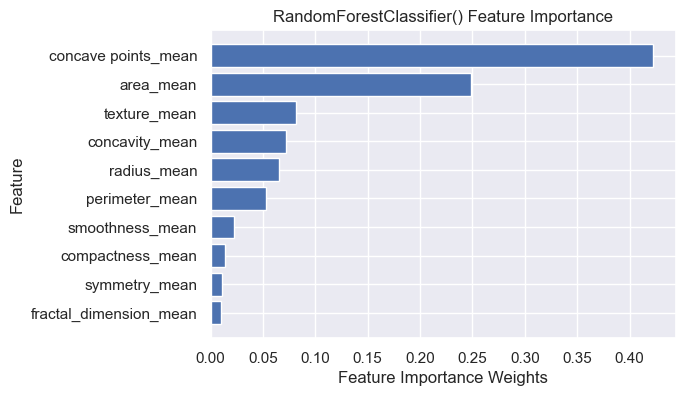

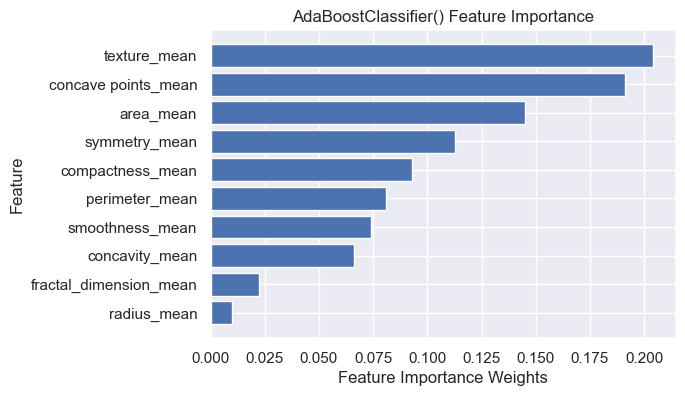

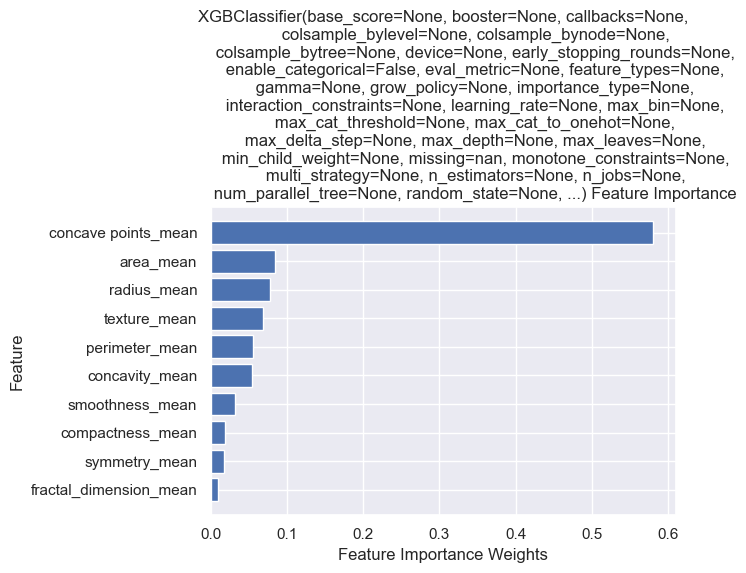

In [304]:
rf_model.plot_feature_importance()
ada_model.plot_feature_importance()
xgb_model.plot_feature_importance()